## Predicting house price using Statsmodels

Linear Regression : model that predicts relationship of direct proportionality between dependent variable and predictor variables.

<img src="img/1.png">

### Dataset

#### Target Variable
* HPI - Housing price index - measures the price changes of residential housing

#### Predictor Variable
* Macroeconomic Activities
    * GDP
    * Unemployment
    * Interest Rates
    
# Source : FRED 
https://fred.stlouisfed.org/

In [3]:
!pip install statsmodels

## Importing libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

sns.set_style('darkgrid')
%matplotlib inline

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


## Import Data

In [5]:
hpi = pd.read_csv('dataset/monthly-hpi.csv')
uemp = pd.read_csv('dataset/unemployment-macro.csv')
ffr = pd.read_csv('dataset/fed_funds.csv')
shiller = pd.read_csv('dataset/shiller.csv')
gdp = pd.read_csv('dataset/gdp.csv')

In [6]:
# merging all the above dataframes into a single dataframe

df = (shiller.merge(hpi,on='date')
      .merge(uemp,on='date')
      .merge(ffr,on='date')
      .merge(gdp,on='date'))

df.head()

,date,sp500,consumer_price_index,long_interest_rate,housing_price_index,total_unemployed,more_than_15_weeks,not_in_labor_searched_for_work,multi_jobs,leavers,losers,federal_funds_rate,total_expenditures,labor_force_pr,producer_price_index,gross_domestic_product
0,2011-01-01,1282.62,220.22,3.39,181.35,16.2,8393,2800,6816,6.5,60.1,0.17,5766.7,64.2,192.7,14881.3
1,2011-04-01,1331.51,224.91,3.46,180.80,16.1,8016,2466,6823,6.8,59.4,0.10,5870.8,64.2,203.1,14989.6
2,2011-07-01,1325.19,225.92,3.00,184.25,15.9,8177,2785,6850,6.8,59.2,0.07,5802.6,64.0,204.6,15021.1
3,2011-10-01,1207.22,226.42,2.15,181.51,15.8,7802,2555,6917,8.0,57.9,0.07,5812.9,64.1,201.1,15190.3
4,2012-01-01,1300.58,226.66,1.97,179.13,15.2,7433,2809,7022,7.4,57.1,0.08,5765.7,63.7,200.7,15291.0


## EDA : Exploratory Data Analysis

* Plotting
* Descriptive Statistics
* **AIM : Figure out the best predictors for our dependent variable**

## OLS : Ordinary Least Square

***OLS is a statistical method that helps estimate the relationship between independent and dependent variables by minimising the sum of squares in the diff b/w observed and predicted values***

### Assumptions

1. Linearity : 
    * dep and indep variables have linear relationship


2. No multicollinearity : 
    * independent variables are not correlated to each other
    * if predictors are highly correlated, then removing them shouldn't drastically reduce Adj. R-squared
    

3. Zero conditional mean : 
    * Average of distances i.e. the residuals between observations and trend line is Zero.
    

4. Homoskedasticity :
    * Variance is constant
    * No pattern in residuals
   
   
5. No Autocorrelation :
    * Autocorrelation is when a variable is correlated w itself across observations.

## Simple linear regression - only 1 predictor and 1 target variable

In [8]:
df.columns

Index(['date', 'sp500', 'consumer_price_index', 'long_interest_rate',
       'housing_price_index', 'total_unemployed', 'more_than_15_weeks',
       'not_in_labor_searched_for_work', 'multi_jobs', 'leavers', 'losers',
       'federal_funds_rate', 'total_expenditures', 'labor_force_pr',
       'producer_price_index', 'gross_domestic_product'],
      dtype='object')

In [9]:
housing_model = ols('housing_price_index ~ total_unemployed',data=df).fit()

housing_model_summary = housing_model.summary()

In [10]:
housing_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     housing_price_index   R-squared:                       0.952
Model:                             OLS   Adj. R-squared:                  0.949
Method:                  Least Squares   F-statistic:                     413.2
Date:                 Sun, 13 Sep 2020   Prob (F-statistic):           2.71e-15
Time:                         11:38:05   Log-Likelihood:                -65.450
No. Observations:                   23   AIC:                             134.9
Df Residuals:                       21   BIC:                             137.2
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          313.3128      5.408     57.938      0.000     302.067     324.559
total_unemployed    -8.3324      0.410    -20.327      0.000      -9.185      -7.480
==============================================================================
Omnibus:                        0.492   Durbin-Watson:                   1.126
Prob(Omnibus):                  0.782   Jarque-Bera (JB):                0.552
Skew:                           0.294   Prob(JB):                        0.759
Kurtosis:                       2.521   Cond. No.                         78.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Accuracy Metrics


* **RMSE - The lower the better**


* **R-squared - proportion of variance of a dependent variable explained by an independent variable or variables in a regression model. Higher the R-squared the better**


* **Adj-R-squared - this metric compensates the addition of variables. It only increases when the new independent variable is enhancing the model - i.e. it is significant. It will decrease if the model contains non-significant variables. Adj-R-Squared <= R-squared**

* Adj. R-squared : 0.95 - 95% of housing prices can be explained by our predictor var. (total_unemployed)


* Regression Coefficients (coef) : 
    * Intercept	: 313.3128
    * total_unemployed	: -8.3324
    * housing_price_index = -8.3324 * total_unemployed + 313.3128 { y = -8.3324 x + 313.3128}
    * Given all other factors constant, 1 unit change in total_unemployed will lead to -8.33 reduction in hpi.
    

* Standard Error : Measure of accuracy. Estimates the variation of coefficient if same test were run on a different sample. Std err - 0.41 pretty low


* p-value : 
    * p-val < 0.05 - significant
    * p-val >= 0.05 - not significant
    

* Confidence Interval : 
    * Range within whicch our coefficient is likely to fall.
    * We can be 95% confident that total_unemployed coefficient will be within the range or confidence interval [-9.185, -7.480]
    

* Durbin-Watson :	1.126
    * Gives measure of autocorrelation
    * Not be under 1 or over 3
    

* F-statistic:	413.2
    * overall significance of linear regression model
    * Prob (F-statistic):	2.71e-15 ???

### Regression plots

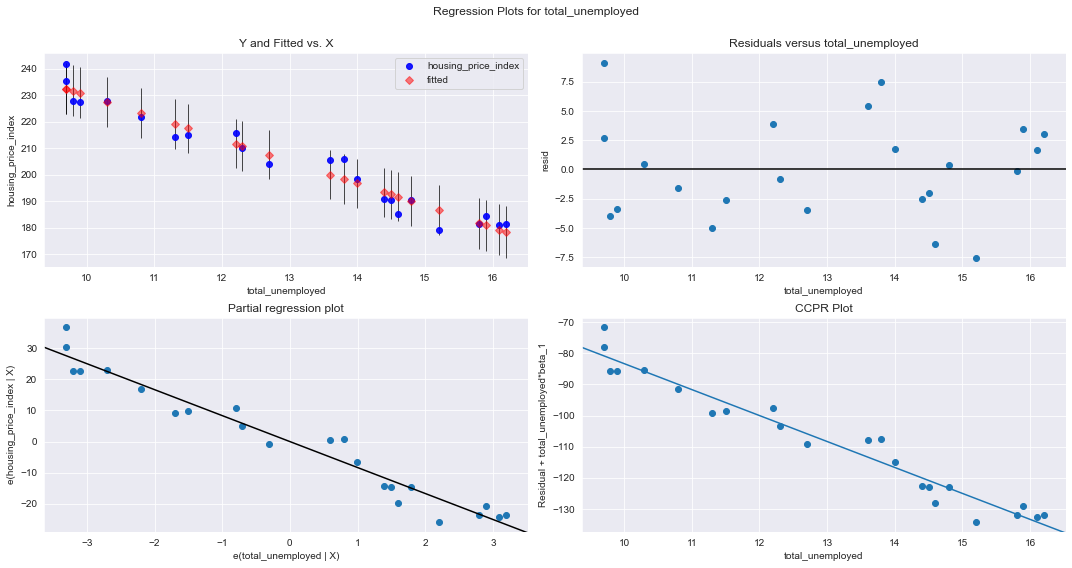

In [11]:
fig = plt.figure(figsize=(15,8))

fig = sm.graphics.plot_regress_exog(housing_model,"total_unemployed",fig=fig)

* **Y and Fitted vs X** - plots the dependent variable against our predicted values with a confidence interval


* **Residual vs Total unemployed** - Look out for pattern, if there is a pattern then the assumption of homoskedasticity is violated.


* **Partical Regression Plot** - Relationship between hpi and total_uep - it also takes into account other independent variable.


* **CCPR - Component and component plus residual plot** - It is an extension of partial regression plot

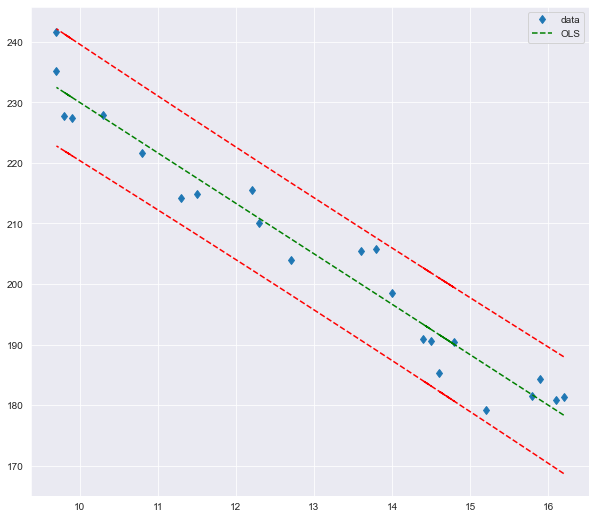

In [16]:
x = df['total_unemployed']
y = df['housing_price_index']

# wls_prediction_std

_,confidence_interval_low,confidence_interval_up = wls_prediction_std(housing_model)

fig, ax = plt.subplots(figsize=(10,9))


ax.plot(x,y,'d',label='data')

ax.plot(x,housing_model.fittedvalues,'g--',label='OLS')

ax.plot(x,confidence_interval_up,'r--')

ax.plot(x,confidence_interval_low,'r--')

ax.legend(loc='best')

## Multiple linear regression

* consumer_price_index


* long_interest_rate


* gross_domestic_product


* total_unemployed


* federal_funds_rate

In [14]:
housing_model2 = ols("""housing_price_index ~ total_unemployed
                                              + long_interest_rate
                                              + federal_funds_rate
                                              + consumer_price_index
                                              + gross_domestic_product""",data=df).fit()

housing_model2_summary = housing_model2.summary()



In [15]:
housing_model2_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     housing_price_index   R-squared:                       0.980
Model:                             OLS   Adj. R-squared:                  0.974
Method:                  Least Squares   F-statistic:                     168.5
Date:                 Sun, 13 Sep 2020   Prob (F-statistic):           7.32e-14
Time:                         12:30:44   Log-Likelihood:                -55.164
No. Observations:                   23   AIC:                             122.3
Df Residuals:                       17   BIC:                             129.1
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -389.2234    187.252     -2.079      0.053    -784.291       5.844
total_unemployed          -0.1727      2.399     -0.072      0.943      -5.234       4.889
long_interest_rate         5.4326      1.524      3.564      0.002       2.216       8.649
federal_funds_rate        32.3750      9.231      3.507      0.003      12.898      51.852
consumer_price_index       0.7785      0.360      2.164      0.045       0.020       1.537
gross_domestic_product     0.0252      0.010      2.472      0.024       0.004       0.047
==============================================================================
Omnibus:                        1.363   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.506   Jarque-Bera (JB):                1.043
Skew:                          -0.271   Prob(JB):                        0.594
Kurtosis:                       2.109   Cond. No.                     4.58e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Adding new variables decreased the impact of total_unemployed on the housing_price_index**

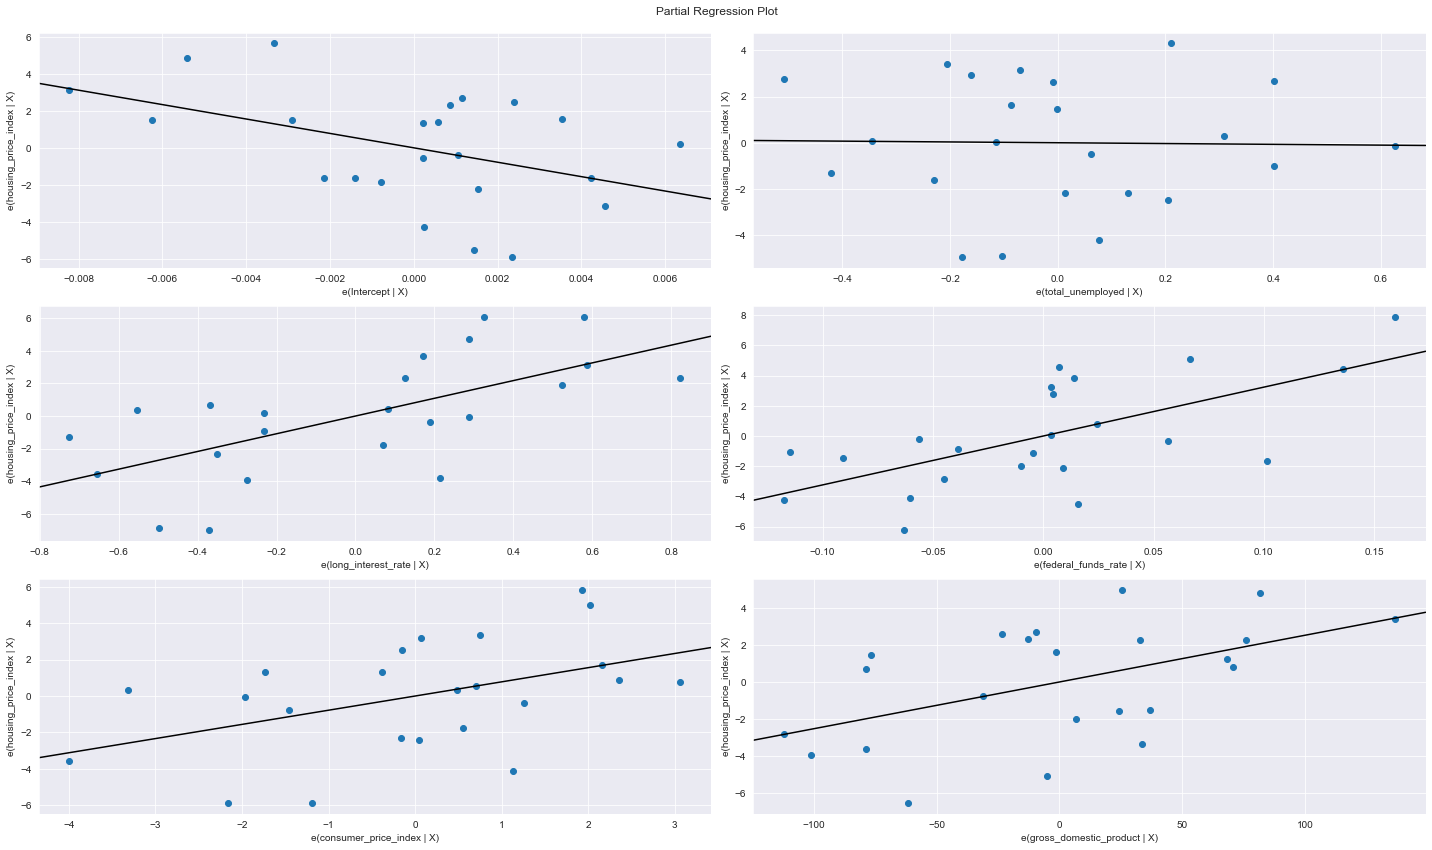

In [17]:
fig = plt.figure(figsize=(20,12))

fig = sm.graphics.plot_partregress_grid(housing_model2,fig=fig)

#### Conclusion:

1. Simple Linear Regression


2. Multiple linear regression


3. predicting housing prices resulting from macroeconomic foces


#### More things that can be done

1. Checking multicollinearity - VIF


2. Sample size - 23 rows - better merge strategy - around 74 rows in all df except gdp


In [22]:
ffr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                74 non-null     object 
 1   federal_funds_rate  74 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.3+ KB


## Combining different DF

* Concatenate
    * Concatenates df along row (axis=0) or col (axis=1)
    * Think of it as stacking up of different df

* Merge
    * Combine basis the values of shared columns
    * based on a condition
    * Example
        * Movie Details - crew, movieid, cast
        * Movie rating - movie id, movie desc, movie rating
        * Merge these 2 datasets on movie_id

* Join
    * extension of concat, join as a param to concat method
    * Outer
        * Takes all indices - default
    * Inner
        * Takes shared indices

# Homework 
* Merge Concatenate Join - Study 

* Linear regression w SKlearn

# Great Job !